In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from pandas import DataFrame

In [30]:
# generate a 2-class classification problem with 2000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=20, n_features=2, centers=2,
                    cluster_std=5.0, random_state=95)

y = np.where(y == 1, 1, -1)

In [32]:
X

array([[  4.31867019,   5.04196515],
       [ -2.48332861,  -6.132576  ],
       [ -7.39375474,  -0.51841562],
       [ -4.4955948 , -13.9764062 ],
       [ -0.60890453,  -9.34802337],
       [  5.56181503,   0.24947272],
       [ -8.38395215, -13.65054682],
       [  6.95070793,   4.30571124],
       [ 11.28618543,   3.0596937 ],
       [ 11.85415186, -11.95988632],
       [ -4.46831084,  -6.50346583],
       [  3.51322432,   0.90498203],
       [ -6.93504204,  -6.81193628],
       [  8.94289982,   4.22839799],
       [  0.60747999,  -2.13091435],
       [ -6.13559619,   2.72249922],
       [ 12.67789744,   6.28895474],
       [  6.6588664 ,   6.4092281 ],
       [  0.01877028,  -5.70034763],
       [  7.0234883 ,  -3.60232692]])

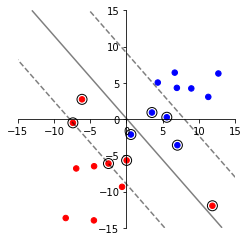

In [38]:
from sklearn import svm
import matplotlib.pyplot as plt

import numpy as np


# fit the model, don't regularize for illustration purposes
Cs=0.0080
clf1 = svm.SVC(kernel='linear', C=Cs)
X_train=X
y_train=y

clf1.fit(X_train, y_train)

fig,ax=plt.subplots()
xmin,xmax=-15.0,15.0
ax.set_xlim([xmin,xmax])
ax.set_ylim([-15,15])


# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

margin = 2 / np.sqrt(np.sum(clf1.coef_ ** 2))
w = clf1.coef_[0]
a = -w[0] / w[1]


# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.scatter(X_train[:, 0], X_train[:, 1], marker="o", s=30,color=["r" if y_train == -1 else "b" for y_train in y_train])


# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf1.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

ax.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='black')



k=w.tolist()
#ax.scatter(k[0],k[1],s=50,c='green')
#plt.plot([0,k[0]],[0,k[1]],c='green')
ax.set_aspect('equal')
#plt.title('$C_4$=%.1f, Margin Width=%.4f'%(Cs,margin))
plt.show()